In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solve(a, b, ua, ub, fi, f, k, dk, n, m):
    vector_x = np.linspace(a, b, n + 1)
    vector_t = np.linspace(0, T, m + 1)
    matrix_u = np.zeros((m + 1, n + 1))

    for i in range(m + 1):
        matrix_u[i][0] = ua
        matrix_u[i][n] = ub

    for i in range(n + 1):
        matrix_u[0][i] = fi(vector_x[i])
            
    for i in range(1, m + 1):
        for j in range(1, n):
            matrix_u[i][j] = (
                tau * dk(vector_x[j]) / h * (matrix_u[i - 1][j + 1] - matrix_u[i - 1][j]) +
                tau * k(vector_x[j]) / (h ** 2) * (matrix_u[i - 1][j + 1] - 2 * matrix_u[i - 1][j] + 
                matrix_u[i - 1][j - 1]) + tau * f(vector_x[j], vector_t[i - 1]) + matrix_u[i - 1][j]
            )        
    
    return matrix_u

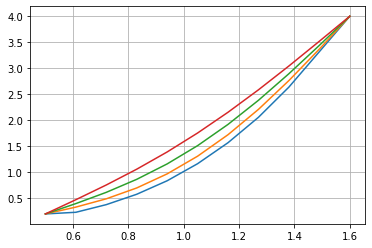

In [21]:
a, b = 0.5, 1.6
ua, ub = 0.2, 4
T = 1

fi = lambda x: x ** 3
f = lambda x, t: (2 * x ** 2 + 2 * x) * (1 - math.e ** (-t))
k = lambda x: 1
dk = lambda x: 0

n = 10
h = 0.1
tau = 0.001
m = int(T / tau)


vector_x = np.linspace(a, b, n + 1)
vector_t = np.linspace(0, T, m + 1)

matrix_u = solve(a, b, ua, ub, fi, f, k, dk, n, m)
for i in [1, 20, 50, 100]:
    plt.plot(vector_x, matrix_u[i])
plt.grid()
plt.show()